In [1]:
import preprocess_data

We are going to first pre-process the data, the above script has a general function to do all the pre-processing
with runProcess() or you can do it individual functions (see File).  The kernel must be restarted again if the original code is changed.  

In [2]:
preprocess_data.runProcess()

created Files
saved masked Files
Number of files extracted (should be 40) from loading masks: 40
padded files
saved padded Files
normalizing Maps using Max-Min
Finished saving files


Example to load padded files and the use min-max Normalization

In [2]:
#load files, names of the padded files:
name = ['apad', 'bpad', 'dpad', 'diffpad', 'perfpad', 'fpad']
#where are files located:
filepath = 'mmasks'

#load files:
lafiles, lbfiles, ldfiles, ldiff_files, lperf_files, lf_files = preprocess_data.loadexisting(filepath, name) 


In [3]:
#check number of files in a list, should be currrently 40:
len(lafiles)

40

In [4]:
#normalize the images using min-max
lafiles, lbfiles, ldfiles = preprocess_data.MaxMinNorm(lafiles, lbfiles, ldfiles)
ldiff_files, lperf_files, lf_files = preprocess_data.MaxMinNorm(ldiff_files, lperf_files, lf_files)

#save the normalized files, create a name and set folder path, folder must already be created
filepath = 'maxmin'
name = ['mm_apad', 'mm_bpad', 'mm_dpad', 'mm_diffpad', 'mm_perfpad', 'mm_fpad']
preprocess_data.savewithPatient(filepath, name, [lafiles, lbfiles, ldfiles, ldiff_files, lperf_files, lf_files])


In [15]:
#lets look at an example image
#need to import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
example1 = np.load('/home/ludeep/Desktop/MRI_Diffusion/maxmin/PAT0018_21_mm_perfpad.npy')

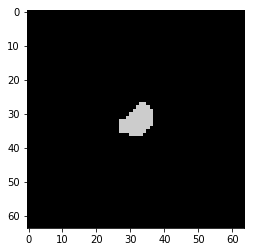

In [23]:
amap = example1[0]
imgplot = plt.imshow(amap)
imgplot.set_cmap('nipy_spectral')

In [36]:
example1 = np.load('/home/ludeep/Desktop/MRI_Diffusion/mmasks/mask_alpha__PAT0018_1_apad.npy')

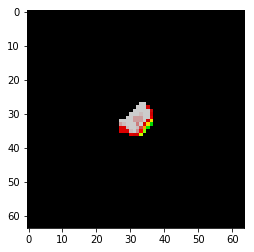

In [37]:
amap = example1[0]
imgplot = plt.imshow(amap)
imgplot.set_cmap('nipy_spectral')

In [38]:
amap.ravel()[np.flatnonzero(amap)]

array([0.99999954, 0.99997882, 0.9999952 , 0.99999982, 0.99999972,
       0.93581418, 0.9991703 , 0.99984706, 0.99999559, 0.99999633,
       0.99949318, 0.95306186, 0.9999318 , 0.99993643, 0.99995455,
       0.99520982, 0.99726065, 0.99995975, 0.93636577, 0.99999991,
       0.99981049, 0.98546043, 0.98473844, 0.98444804, 0.997625  ,
       0.99997375, 0.87595897, 0.99999661, 0.99939008, 0.99999933,
       0.99999527, 0.98565129, 0.98501052, 0.98768633, 0.99999379,
       0.93605086, 0.72503968, 0.98769763, 0.9932434 , 0.99999738,
       0.99971938, 0.99989877, 0.97730993, 0.99619508, 0.9129938 ,
       0.73769555, 0.53978898, 0.9       , 0.9       , 0.9941107 ,
       0.99972954, 0.99971114, 0.99274682, 0.96757813, 0.79528511,
       0.56076378, 0.9       , 0.9       , 0.9       , 0.99462661,
       0.99977749, 0.98132585, 0.85310837, 0.6364602 , 0.9       ,
       0.93641455, 0.91527381, 0.6580361 ])

Since we only have 40 samples, we augment the data by cropping the map into 3 pieces, and then doing random flips and rotations on each of the new crops.  We also do random rotations and flips on the non-cropped images.

In [6]:
import augumentImages

In [7]:
name = ['mm_apad', 'mm_bpad', 'mm_dpad']
filepath = 'maxmin'
onames = ['alpha', 'beta', 'ddc']
opath = 'maxminAug'

augumentImages.augImages(filepath,name,onames,opath)

obtaining files
saving augmented files


In [8]:
name = ['mm_diffpad', 'mm_perfpad', 'mm_fpad']
filepath = 'maxmin'
onames = ['diff', 'perf', 'f']
opath = 'maxminAug'

augumentImages.augImages(filepath,name,onames,opath)

obtaining files
saving augmented files


Some of the stuff in augument images is hard-coded so it only takes 3 maps at a time.  This could be improved later to be more dynamic.  Now lets look at one of the images.

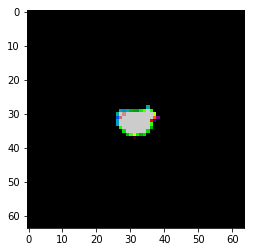

In [39]:
#cropped alpha map
example1 = np.load('maxminAug/ogaug_perf_PAT0018_21.npy')
amap = example1[0]
imgplot = plt.imshow(amap)
imgplot.set_cmap('nipy_spectral')



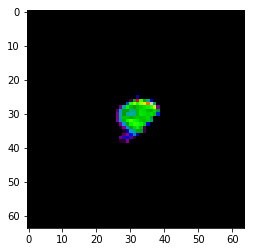

In [12]:
#original map Augumented
example1 = np.load('maxminAug/ogaug_f_PAT0005_5.npy')
amap = example1[0]
imgplot = plt.imshow(amap)
imgplot.set_cmap('nipy_spectral')

Now lets extract all the histogram features of the all the maps.  

In [1]:
import basicBeastures

The script above calculates all features of the maps, look at basicBeastures.runScript() to modify bin_widths of histogram features and to specify location of maps and where features should be saved

In [3]:
import classification_comparison2

The script above uses the features generated to compare various classifiers.  Specifically we compare:

```python
names = ["Linear_SVM", "RBF_SVM", "Gaussian_Process",
         "Decision_Tree", "Random_Forest", "AdaBoost",
         "Naive_Bayes"]
```

We use a Gradient Boosted Classifer for optimal results, which is fine-tuned using Grid Search.  Look at the grid search function for determine how to fine tune.  Note based on the hyper-parameters needed to iterate over, the grid_search increases in time and complexity.

Look at classification_comparison2.runScript() to determine various inputs and outputs of the all functions.  